In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath('..'))

from src.data_loader import DataLoader
from src.risk_factors import PortfolioMetrics
from src.var_modules import RiskCalculator
from src.stress_scenarios import StressTester

%matplotlib inline
sns.set_theme(style="whitegrid")

In [2]:
# Préparation des données
TICKERS = ['AAPL', 'JPM', 'XOM', 'TLT']
WEIGHTS = [0.4, 0.2, 0.2, 0.2]
loader = DataLoader(TICKERS, "2020-01-01", "2025-12-31")
returns = loader.calculate_returns(loader.get_data())
metrics = PortfolioMetrics(returns, WEIGHTS)
calculator = RiskCalculator(metrics)

# Récupération des scénarios définis dans stress_scenarios.py
scenarios = StressTester.get_scenarios()
results = {}

print("Lancement des simulations Monte Carlo...")
for name, factor in scenarios.items():
    # On simule 10 000 jours pour chaque scénario
    var, cvar, sims = calculator.monte_carlo_var_cvar(sims=10000, stress_factor=factor)
    results[name] = sims # On stocke les rendements simulés
    print(f"Scénario {name} (Vol x{factor}) terminé.")

Chargement des données pour ['AAPL', 'JPM', 'XOM', 'TLT']...


[*********************100%***********************]  4 of 4 completed

Lancement des simulations Monte Carlo...
Scénario Normal (Vol x1.0) terminé.
Scénario Crise_Moderee (Vol x1.25) terminé.
Scénario Crise_Majeure (Vol x1.5) terminé.
Scénario Black_Swan (Vol x2.0) terminé.


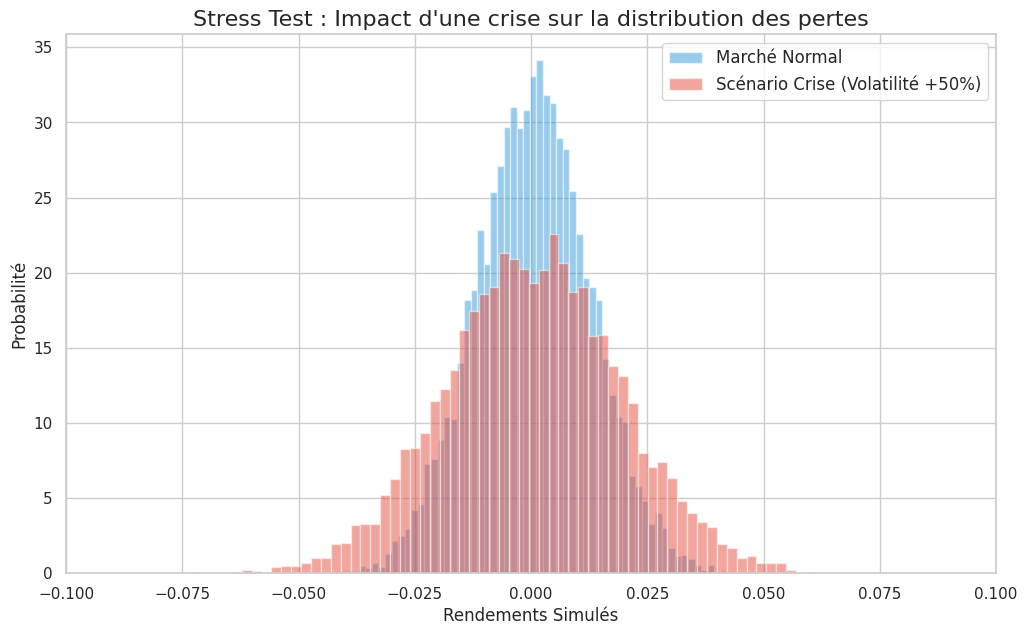

In [3]:
plt.figure(figsize=(12, 7))

# 1. Distribution Normale
plt.hist(results['Normal'], bins=70, alpha=0.5, label='Marché Normal', density=True, color='#3498db')

# 2. Distribution Crise Majeure
plt.hist(results['Crise_Majeure'], bins=70, alpha=0.5, label='Scénario Crise (Volatilité +50%)', density=True, color='#e74c3c')

plt.title("Stress Test : Impact d'une crise sur la distribution des pertes", fontsize=16)
plt.xlabel("Rendements Simulés")
plt.ylabel("Probabilité")
plt.legend(fontsize=12)
plt.xlim(-0.10, 0.10) # Zoom sur la zone intéressante (-10% à +10%)
plt.show()